1.  To classify the images of a dog & cat - Binary Classification Problem
2.  Deep Learning Model - Pre-Trained MobileNet V2 Model
3.  Work Flow

    *   Collect Dog & Cat Images Data - Kaggle Dataset (API)
    *   Data Pre-Processing
    *   Train-Test Split
    *   Deep Learning Model - Pre-Trained MobileNet V2 Model
    *   DL Model Evaluation
    *   Develop Prediction System - Feed new data to trained model to predict image of either a cat or a dog

Extracting Dataset using Kaggle API

In [ ]:
# installing the kaggle library

!pip install kaggle

In [ ]:
# configuring the path of kaggle.json file

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the Dog & Cat Dataset from Kaggle

In [ ]:
# kaggle api

!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

 dogs-vs-cats.zip   kaggle.json   sampleSubmission.csv	 train
'image resized'     sample_data   test1.zip		 train.zip


In [ ]:
# extracting the compressed file - dogs vs cats zip file

from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
# extracting the compressed file - train zip file

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import os

# counting the number of files in train folder

path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('The number of images: ', file_count)

The number of images:  25000


Printing the name & number of images

In [ ]:
file_names = os.listdir('/content/train')
print(file_names)

['dog.6129.jpg', 'dog.10474.jpg', 'dog.6856.jpg', 'dog.3624.jpg', 'cat.8393.jpg', 'dog.2027.jpg', 'cat.4460.jpg', 'cat.8423.jpg', 'cat.2885.jpg', 'dog.4032.jpg', 'dog.131.jpg', 'cat.11734.jpg', 'dog.486.jpg', 'dog.1492.jpg', 'dog.478.jpg', 'cat.3476.jpg', 'cat.8484.jpg', 'dog.1781.jpg', 'cat.4838.jpg', 'dog.4175.jpg', 'dog.4646.jpg', 'cat.1276.jpg', 'dog.8233.jpg', 'dog.10652.jpg', 'cat.7153.jpg', 'dog.3101.jpg', 'dog.4074.jpg', 'dog.1834.jpg', 'cat.786.jpg', 'cat.4742.jpg', 'dog.11969.jpg', 'cat.35.jpg', 'dog.12432.jpg', 'cat.3468.jpg', 'cat.7016.jpg', 'cat.3852.jpg', 'cat.10534.jpg', 'cat.6553.jpg', 'cat.7509.jpg', 'dog.7264.jpg', 'dog.8083.jpg', 'dog.1734.jpg', 'cat.1208.jpg', 'dog.1753.jpg', 'dog.10723.jpg', 'dog.6293.jpg', 'cat.891.jpg', 'dog.4514.jpg', 'dog.1094.jpg', 'cat.7183.jpg', 'dog.12246.jpg', 'cat.6448.jpg', 'cat.5334.jpg', 'dog.10975.jpg', 'dog.10917.jpg', 'cat.8383.jpg', 'cat.10903.jpg', 'dog.5825.jpg', 'dog.9946.jpg', 'cat.8221.jpg', 'dog.9354.jpg', 'dog.1877.jpg', 'ca

In [ ]:
file_names = os.listdir('/content/train')

for i in range(5):

  name = file_names[i]
  print(name[0:3])

dog
dog
dog
dog
cat


In [ ]:
file_names = os.listdir('/content/train')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print ('Number of dog images = ', dog_count)
print ('Number of cat images = ', cat_count)

Number of dog images =  12500
Number of cat images =  12500


Importing the Dependencies

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the Dogs and Cats Images

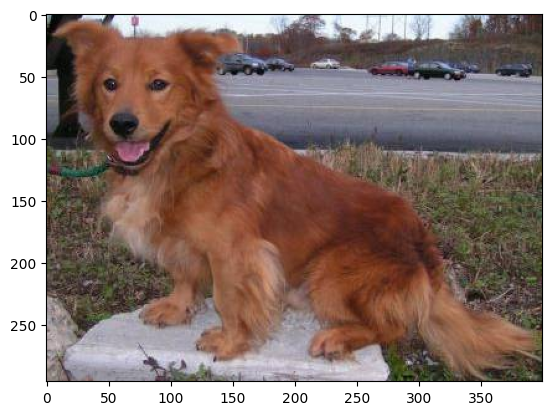

In [ ]:
# display the dog image

img = mpimg.imread('/content/train/dog.6129.jpg')
imgplot = plt.imshow(img)
plt.show()

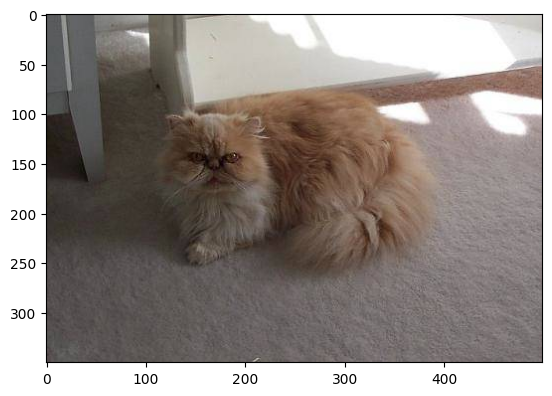

In [ ]:
# display the cat image

img = mpimg.imread('/content/train/cat.8393.jpg')
imgplot = plt.imshow(img)
plt.show()

Resizing All the Images

In [ ]:
# creating the directory for the resized images

os.mkdir('/content/image resized')

FileExistsError: [Errno 17] File exists: '/content/image resized'

In [ ]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder + filename

  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  newimgpath = resized_folder + filename
  img.save(newimgpath)

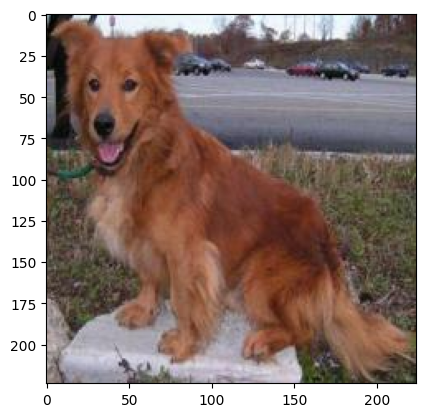

In [ ]:
# display the resized dog image

img = mpimg.imread('/content/image resized/dog.6129.jpg')
imgplot = plt.imshow(img)
plt.show()

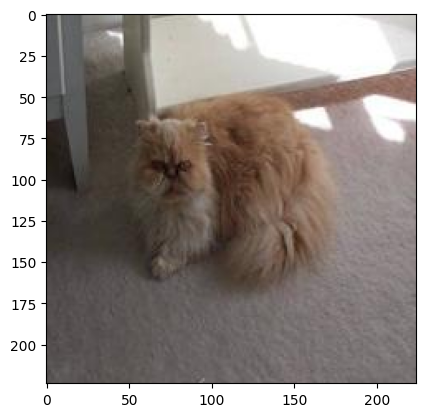

In [ ]:
# display the cat image

img = mpimg.imread('/content/image resized/cat.8393.jpg')
imgplot = plt.imshow(img)
plt.show()

Creating Labels for Resized Images of Dogs & Cats

Cat --> 0

Dog --> 1

In [ ]:
# creating a for loop to assign the labels

filenames = os.listdir('/content/image resized/')

labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [ ]:
print(filenames[0:5])
print(len(filenames))

['dog.6129.jpg', 'dog.10474.jpg', 'dog.6856.jpg', 'dog.3624.jpg', 'cat.8393.jpg']
2000


In [ ]:
print(labels[0:5])
print(len(labels))

[1, 1, 1, 1, 0]
2000


In [ ]:
# counting the images of dogs and cats out of 2000 images

value, counts = np.unique(labels, return_counts = True)
print(value)
print(counts)

[0 1]
[1029  971]


Converting the Resized Images to Numpy Array

In [ ]:
import cv2
import glob

In [ ]:
image_directory = '/content/image resized/'
image_extention = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extention]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(dog_cat_images)

[[[[168 164 140]
   [206 202 178]
   [135 131 112]
   ...
   [ 47  48  69]
   [ 38  40  64]
   [ 36  38  62]]

  [[176 171 150]
   [178 175 154]
   [ 96  92  73]
   ...
   [ 41  42  63]
   [ 35  37  61]
   [ 38  40  64]]

  [[171 167 148]
   [147 143 124]
   [ 61  56  41]
   ...
   [ 37  38  59]
   [ 36  38  62]
   [ 42  44  68]]

  ...

  [[130 134 145]
   [134 138 149]
   [133 139 152]
   ...
   [ 87 104 100]
   [ 62  77  73]
   [ 31  46  42]]

  [[130 136 147]
   [126 132 143]
   [123 129 142]
   ...
   [ 80  98  91]
   [ 60  76  69]
   [ 45  61  54]]

  [[135 141 152]
   [125 131 142]
   [122 128 141]
   ...
   [ 44  62  55]
   [ 30  46  39]
   [ 34  50  43]]]


 [[[ 47 145 169]
   [ 50 150 174]
   [ 52 154 177]
   ...
   [ 53 139 159]
   [ 54 140 160]
   [ 57 143 163]]

  [[ 51 147 170]
   [ 48 147 169]
   [ 46 147 169]
   ...
   [ 57 143 163]
   [ 56 142 162]
   [ 57 143 163]]

  [[ 65 156 177]
   [ 59 152 173]
   [ 58 153 173]
   ...
   [ 60 147 167]
   [ 59 145 165]
   [ 57 143

In [ ]:
type(dog_cat_images)

numpy.ndarray

In [ ]:
dog_cat_images.shape

(2000, 224, 224, 3)

In [ ]:
X = dog_cat_images
Y = np.asarray(labels)

Train-Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


Normalization

In [ ]:
# scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
print(X_train_scaled)

[[[[0.65098039 0.67843137 0.61960784]
   [0.67843137 0.70588235 0.64705882]
   [0.67843137 0.70588235 0.64705882]
   ...
   [0.04705882 0.08235294 0.13333333]
   [0.04705882 0.08235294 0.13333333]
   [0.04313725 0.07843137 0.12941176]]

  [[0.6627451  0.69019608 0.63137255]
   [0.68627451 0.71372549 0.65490196]
   [0.68235294 0.70980392 0.65098039]
   ...
   [0.04313725 0.07843137 0.12941176]
   [0.04313725 0.07843137 0.12941176]
   [0.03529412 0.07058824 0.12156863]]

  [[0.67058824 0.69803922 0.63921569]
   [0.69411765 0.72156863 0.6627451 ]
   [0.69019608 0.71764706 0.65882353]
   ...
   [0.05490196 0.09019608 0.14117647]
   [0.04705882 0.08235294 0.13333333]
   [0.03921569 0.0745098  0.1254902 ]]

  ...

  [[0.9254902  0.92941176 0.92156863]
   [0.9254902  0.92941176 0.92156863]
   [0.92156863 0.9254902  0.91764706]
   ...
   [0.74509804 0.75294118 0.70588235]
   [0.74509804 0.75294118 0.70588235]
   [0.73333333 0.74117647 0.69411765]]

  [[0.92941176 0.93333333 0.9254902 ]
   [0.9

Model Training - Transfer Learning (MobileNet V2)

In [ ]:
!pip install tensorflow==2.15.0 tensorflow-hub

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape = (224,224,3), trainable = False)

In [ ]:
num_of_classes = 2

model = tf.keras.Sequential([

                             pretrained_model,
                             tf.keras.layers.Dense(num_of_classes) # output layer

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              3540265   
                                                                 
 dense (Dense)               (None, 2)                 2004      
                                                                 
Total params: 3542269 (13.51 MB)
Trainable params: 2004 (7.83 KB)
Non-trainable params: 3540265 (13.51 MB)
_________________________________________________________________


In [ ]:
model.compile(

              optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['acc']

)

In [ ]:
model.fit(X_train_scaled, Y_train, epochs = 5)

Epoch 1/5
50/50 [==============================] - 82s 2s/step - loss: 0.3193 - acc: 0.8712
Epoch 2/5
50/50 [==============================] - 82s 2s/step - loss: 0.0759 - acc: 0.9756
Epoch 3/5
50/50 [==============================] - 99s 2s/step - loss: 0.0489 - acc: 0.9850
Epoch 4/5
50/50 [==============================] - 94s 2s/step - loss: 0.0359 - acc: 0.9900
Epoch 5/5
50/50 [==============================] - 93s 2s/step - loss: 0.0299 - acc: 0.9944


In [ ]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test loss = ', score)
print('Test accuracy = ', acc)

13/13 [==============================] - 19s 1s/step - loss: 0.0896 - acc: 0.9750
Test loss =  0.08959189057350159
Test accuracy =  0.9750000238418579


Building A Predictive System

Path of the image to be predicted: /content/cat.jpg


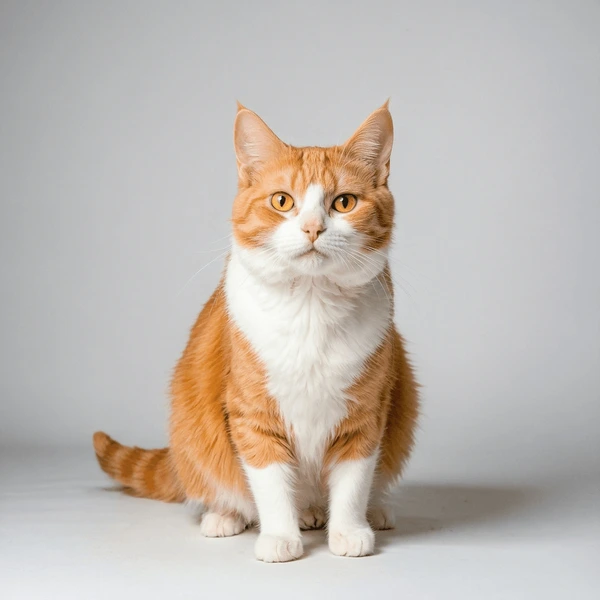

1/1 [==============================] - 0s 60ms/step
[[ 5.9710803 -5.317991 ]]
0
The image is a cat


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path) # convert jpg/png image into numpy array

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image is a cat')

else:
  print('The image is a dog')